# POC

Methodology for POC:

1. Choose "AAPL".
2. Scrape news (from Yahoo Finance), for Apple stock via scrapling
3. Use ChatGPT to determine the sentiment of each news on scale of 1 to 5:

- 1 -> Negative
- 2 -> Moderate negative
- 3 -> Neutral
- 4 -> Moderate positive
- 5 -> Positive

4. Use ChatGPT to determine the stock that has highest cointegration with Apple

5. Use Selenium to load more news article


# Table of Contents

1. [Select Stocks](#select-stocks)
2. [Extract News](#extract-news)
3. [Perplexity Results](#perplexity-results-gpt-4o)
   - 3.1 [Prompt](#prompt)
   - 3.2 [Response](#response)
   - 3.3 [Cointegration](#cointegration)
   - 3.4 [Correlation](#correlation)
4. [Selenium](#selenium)
5. [Playwright](#playwright)


In [2]:
import pandas as pd
import random
import sys
from pathlib import Path
import scrapling
from scrapling import Fetcher
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup
import re
from datetime import datetime

repo_dir = Path.cwd().as_posix()

if repo_dir not in sys.path:
    sys.path.append(repo_dir)

%load_ext autoreload
%autoreload 2

from src.utils import utils, yahoo_utils
from src.poc import Poc
from src.sentiment import SentimentRater


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# [Select Stocks](#table-of-contents)

- Test "AAPL", "NVDA", and "PG" for POC.
- If time permits, then test the randomly selected stocks for each GICS Sector: ['PWR', 'INCY', 'CDW', 'CEG', 'BAC', 'LIN', 'BWA', 'ARE', 'CHTR', 'KDP', 'PSX']


In [33]:
stock_list = utils.gen_stock_list()
stock_list

{'Industrials': 'PWR',
 'Health Care': 'INCY',
 'Information Technology': 'CDW',
 'Utilities': 'CEG',
 'Financials': 'BAC',
 'Materials': 'LIN',
 'Consumer Discretionary': 'BWA',
 'Real Estate': 'ARE',
 'Communication Services': 'CHTR',
 'Consumer Staples': 'KDP',
 'Energy': 'PSX'}

In [36]:
utils.get_gics_sector(
    ["AAPL", "MSFT", "NVDA", "GOOGL", "META", "XOM", "CRM", "HD", "PG"]
)

{'AAPL': 'Information Technology',
 'MSFT': 'Information Technology',
 'NVDA': 'Information Technology',
 'GOOGL': 'Communication Services',
 'META': 'Communication Services',
 'XOM': 'Energy',
 'CRM': 'Information Technology',
 'HD': 'Consumer Discretionary',
 'PG': 'Consumer Staples'}

# [Extract News](#table-of-contents)

- https://finance.yahoo.com/quote/AAPL/news/
- Scrapling aren't able to web scrap fully since the news are loaded when user scroll to the end of screen.


In [98]:
# Extract news related to AAPL from Yahoo Finance
news_info = yahoo_utils.extract_news_briefs(
    "https://finance.yahoo.com/quote/AAPL/news/"
)
news_info

[2025-03-08 21:01:29] INFO: Fetched (200) <GET https://finance.yahoo.com/quote/AAPL/news/> (referer: https://www.google.com/search?q=yahoo)


[{'publisher': 'Motley Fool',
  'period': datetime.timedelta(seconds=7200),
  'title': 'Could Apple Be a Millionaire-Maker Stock?',
  'content': 'During its rise to become a dominant tech enterprise, Apple (NASDAQ: AAPL) has certainly made its early investors some serious money. In the past two decades, shares have generated a total return of greater than 18,000%, boosted by the introduction of popular hardware devices and services. Could Apple be a millionaire-maker stock?'},
 {'publisher': 'Insider Monkey',
  'period': datetime.timedelta(seconds=43200),
  'title': 'Apple Inc. (AAPL) Unveils AI-Powered MacBook Air with M4 Chip',
  'content': 'We recently compiled a list of the 10 Hot AI News Updates Analysts are Monitoring. In this article, we are going to take a look at where Apple Inc. (NASDAQ:AAPL) stands against the other AI stocks. According to Goldman Sachs, the AI-powered rally in Chinese equities could boost other markets as well. Consequently, the firm has […]'},
 {'publisher

# [Perplexity Results (GPT-4o)](#table-of-contents)


## [Prompt](#table-of-contents)

The list of dictionaries are attached with the following prompt in Perplexity:

```
You are a stock analysis expert.

I've attached list of dictionaries containing news info specifically:

1. publisher = Source where news are generated
2. period = Amount of time lapsed after news release
3. title = News title
4. content = News content in brief

Each dictionary is supposed to be related to Apple stock.

Your task:
1. Review the 'title' and 'content' keys in each dictionary to access the sentiment related to Apple stock.
2. Use ONLY following rating:

    1 = Negative
    2 = Moderate negative
    3 = Neutral
    4 = Moderate positive
    5 = Positive

3. If the news are not related to a Apple stock, please give a rating of 3.
4. Please review all dictionary items in the attached list and provide the corresponding rating.
5. After reviewing all dictionary items, kindly provide an overall sentiment rating for Apple stock.
```


## [Response](#table-of-contents)

Response from Perplexity (ChatGPT 4-o):

```
Sentiment Ratings for Each News Item
Title: "Could Apple Be a Millionaire-Maker Stock?"
Content: Highlights Apple's historical success and potential for future gains.
Rating: 5 (Positive)

Title: "Apple Inc. (AAPL) Unveils AI-Powered MacBook Air with M4 Chip"
Content: Discusses the launch of an innovative product, indicating progress in AI.
Rating: 5 (Positive)

Title: "Apple (AAPL) Beats Stock Market Upswing: What Investors Need to Know"
Content: Reports a positive trading session for Apple stock.
Rating: 4 (Moderate positive)

Title: "Apple Delays Siri Upgrade Indefinitely as AI Concerns Escalate"
Content: Focuses on delays in Apple's AI projects, raising concerns.
Rating: 2 (Moderate negative)

Title: "Apple Is Pushing Back AI-Driven Siri Features to 2026, Report Says"
Content: Similar to the previous item, emphasizes delays in Siri enhancements.
Rating: 2 (Moderate negative)

Title: "Apple Says Some AI-Powered Enhancements to Siri to Be Delayed"
Content: Mentions delays in Siri updates amid slumping iPhone sales.
Rating: 2 (Moderate negative)

Title: "Sector Update: Tech Stocks Advance Late Afternoon"
Content: General update on tech stocks without specific focus on Apple.
Rating: 3 (Neutral)

Title: "Magnificent Seven Stocks: Nvidia Reverses Higher; Amazon, Meta, Tesla Slide"
Content: Discusses multiple tech stocks, with a brief mention of Apple’s mixed performance in 2025.
Rating: 3 (Neutral)

Title: "Apple says some AI improvements to Siri delayed to 2026"
Content: Reiterates delays in Siri's AI features, consistent with earlier reports.
Rating: 2 (Moderate negative)

Title: "Apple's First Foldable iPhone Could Launch in 2026 With Premium Pricing and AI Features"
Content: Speculates on a high-priced foldable iPhone with advanced features, suggesting innovation but no immediate impact.
Rating: 4 (Moderate positive)

Title: "Apple Inc. (AAPL): Jim Cramer Cautions – ‘I Could See the Stock Going Lower!’"
Content: Warns of potential downside for Apple stock, reflecting negativity.
Rating: 1 (Negative)

Title: "Apple Secures Local Content Certifications in Indonesia but Faces Additional Regulatory Hurdles"
Content: Notes progress in regulatory compliance but highlights challenges ahead.
Rating: 3 (Neutral)

Title: "Is Apple Inc. (AAPL) Among the Best Warren Buffett Stock to Buy Right Now?"
Content: Discusses Apple's position as a strong investment option under Warren Buffett’s philosophy, implying positivity.
Rating: 4 (Moderate positive)

Title: "The Mag 7 Stocks Are No Longer Magnificent. Where the Charts Say They Go Next."
Content: Broad commentary on tech stocks, including Apple, with no clear sentiment focus on Apple itself.
Rating: 3 (Neutral)

Title: "Broadcom Shares Jump as AI Growth Fuels Upbeat Forecast"
Content: Primarily about Broadcom, with indirect relevance to Apple as a client company.
Rating: 3 (Neutral)

Title: "Major Breakthrough: New Certificates Propel Apple iPhone 16 into Indonesia"
Content: Highlights progress in regulatory certification for iPhone sales in Indonesia, indicating positive developments for Apple’s market expansion.
Rating: 4 (Moderate positive)

Title: "In Rotten Market, Top Funds Harvest Apple Stock — And 10 Others"
Content: Indicates institutional confidence in Apple stock despite broader market challenges, reflecting positivity.
Rating: 4 (Moderate positive)

Title: "Apple's iPhone 16 Still on Hold in Indonesia Despite Key Certification Win"
Content: Acknowledges regulatory progress but emphasizes ongoing hurdles for product launch in Indonesia.
Rating: 3 (Neutral)

Title: "Cloud AI Today - Cirrascale Launches Inference Cloud For Scalable AI Integration"
Content: Not related to Apple stock specifically but mentions general AI developments in the industry.
Rating: 3 (Neutral)

Title: "38% of Berkshire Hathaway's Portfolio Is Invested in These 3 Unstoppable Dividend Stocks"
Content: General commentary on Warren Buffett’s portfolio with no specific focus on Apple stock sentiment.
Rating: 3 (Neutral)

Overall Sentiment Rating for Apple Stock
The individual ratings suggest a mix of sentiments:

Positive/Moderate Positive Ratings (5 or 4): 8 items

Neutral Ratings (3): 8 items

Negative/Moderate Negative Ratings (1 or 2): 4 items

The overall sentiment leans toward moderately positive for Apple stock, reflecting optimism tempered by some concerns over delays and market challenges.

Final Overall Sentiment Rating:
4 (Moderate positive)
```


## [Cointegration](#table-of-contents)

ChatGPT is not able to provide the stock with highest cointegration value with Apple stock:

```
The query about which S&P 500 stock has the highest cointegration value with Apple stock cannot be answered directly using the provided search results. Cointegration analysis requires statistical computations based on historical price data of Apple stock and other S&P 500 stocks. This involves time-series analysis to determine the long-term equilibrium relationship between Apple and other stocks.

If you have access to historical price data for Apple and other S&P 500 stocks, you can calculate cointegration values using statistical software or programming languages such as Python or R. The process typically involves:

Collecting Data: Obtain historical price data for Apple (AAPL) and other S&P 500 stocks over a specific period.

Stationarity Testing: Use tests like the Augmented Dickey-Fuller (ADF) test to ensure the time series are stationary.

Cointegration Testing: Apply tests such as the Engle-Granger two-step method or Johansen test to identify stocks with high cointegration values with Apple.

If you provide relevant price data or specify tools available, I can guide you further on how to perform this analysis.
```


## [Correlation](#table-of-contents)

ChatGPT 4-o stated Microsoft has the highest degree of correlation:

```
The stock most correlated with Apple (AAPL) among S&P 500 companies is Microsoft (MSFT). Historically, Apple and Microsoft have shown a high degree of correlation due to their positions as leading technology companies and their exposure to similar market dynamics, such as consumer electronics, cloud computing, and software services.

While specific numerical correlation values for S&P 500 stocks are not provided in the search results, Microsoft is widely recognized as one of Apple’s closest peers in terms of performance trends and market behavior. If you need precise correlation coefficients, you would need to calculate them using historical price data for Apple and other S&P 500 stocks over a specific period. Tools like Python, R, or financial platforms can help generate a correlation matrix for this purpose.
```


# [Selenium](#table-of-contents)

- Selenium is not suitable as it occasionally run into ReadTimeoutError causing the code to break. Hence we are not able to perform scrolling to required level.
- Running in Jupyter Notebook causes timeout error due to async operation of Jupyter Notebook.


In [ ]:
url = "https://finance.yahoo.com/quote/AAPL/news/"
scroll_limit = 5

driver = webdriver.Chrome()
driver.get(url)

# Locate <a> tag and navigate to its parent <div>
parent_div = driver.find_elements(By.XPATH, "//div[@class='content yf-82qtw3']")

# parent_div.get_attribute("class")

# # Print the class attribute of the parent <div>
# title_element = parent_div.find_element(By.XPATH, ".//h3[contains(@class, 'yf-82qtw3)]")
# title_element.text

ReadTimeoutError: HTTPConnectionPool(host='localhost', port=37797): Read timed out. (read timeout=120)

# [Playwright](#table-of-contents)


In [ ]:
<div class="" content yf-82qtw3><a class="subtle-link fin-size-small titles noUnderline yf-1xqzjha"
        data-ylk="elm:hdln;elmt:link;itc:0;ct:story;slk:Shareholders%20are%20showing%20signs%20of%20DEI%20fatigue%20as%20activists%20push%20for%20more%20votes;sec:qsp-news;subsec:all;cpos:1;g:a42c9cba-3739-4dae-8402-e5acaa0ad944"
        href="https://finance.yahoo.com/news/shareholders-are-showing-signs-of-dei-fatigue-as-activists-push-for-more-votes-140136546.html"
        aria-label="Shareholders are showing signs of DEI fatigue as activists push for more votes"
        title="Shareholders are showing signs of DEI fatigue as activists push for more votes" data-rapid_p="23"
        data-v9y="1">
        <h3 class="clamp  yf-82qtw3">Shareholders are showing signs of DEI fatigue as activists push for more votes</h3>
        <p class="clamp  yf-82qtw3">Champions and critics of DEI policies are again pushing American companies to either
            bolster or diminish their diversity policies. But so far this year, none of the proposals are garnering
            shareholder support.</p>
    </a>
    <div class="footer yf-82qtw3">
        <div class="publishing yf-1weyqlp">Yahoo Finance <i aria-hidden="true" data-svelte-h="svelte-sg6bkb">•</i> 13
            hours ago</div>
        <div class="taxonomy-links yf-13tszyc"><a data-testid="ticker-container"
                class="ticker x-small hover2 border streaming yf-1fqyif7" aria-label="DE"
                data-ylk="elm:qte;elmt:link;itc:0;sec:qsp-news;slk:DE;subsec:all;cpos:1" href="/quote/DE/" title="DE"
                data-rapid_p="24" data-v9y="1">
                <div class="name yf-1fqyif7"><span class="symbol yf-1fqyif7">DE </span> </div> <fin-streamer
                    class="percentChange yf-1fqyif7" data-symbol="DE" data-field="regularMarketChangePercent"
                    data-trend="txt" data-pricehint="2" data-tstyle="default" active=""><span
                        class="d60f3b00 c4af00a5">+3.48%</span></fin-streamer>
            </a> <a data-testid="ticker-container" class="ticker x-small hover2 border streaming yf-1fqyif7"
                aria-label="COST" data-ylk="elm:qte;elmt:link;itc:0;sec:qsp-news;slk:COST;subsec:all;cpos:1"
                href="/quote/COST/" title="COST" data-rapid_p="25" data-v9y="1">
                <div class="name yf-1fqyif7"><span class="symbol yf-1fqyif7">COST </span> </div> <fin-streamer
                    class="percentChange yf-1fqyif7" data-symbol="COST" data-field="regularMarketChangePercent"
                    data-trend="txt" data-pricehint="2" data-tstyle="default" active=""><span
                        class="d60f3b00 d5882186">-6.07%</span></fin-streamer>
            </a> <a data-testid="ticker-container" class="ticker x-small hover2 border streaming yf-1fqyif7"
                aria-label="AAPL" data-ylk="elm:qte;elmt:link;itc:0;sec:qsp-news;slk:AAPL;subsec:all;cpos:1"
                href="/quote/AAPL/" title="AAPL" data-rapid_p="26" data-v9y="1">
                <div class="name yf-1fqyif7"><span class="symbol yf-1fqyif7">AAPL </span> </div> <fin-streamer
                    class="percentChange yf-1fqyif7" data-symbol="AAPL" data-field="regularMarketChangePercent"
                    data-trend="txt" data-pricehint="2" data-tstyle="default" active=""><span
                        class="d60f3b00 c4af00a5">+1.59%</span></fin-streamer>
            </a> </div>
    </div>
</div>

'<!DOCTYPE html>\n<html class="desktop neo-green dock-upscale ybar-page-is-scrolled ybar-hide-navigation" data-color-scheme="auto" data-color-theme-enabled="true" lang="en-US" theme="auto">\n <head>\n  <title>\n   Apple Inc. (AAPL) Latest Stock News &amp; Headlines - Yahoo Finance\n  </title>\n  <!-- HTML_TAG_START -->\n  <!-- HTML_TAG_END -->\n  <!-- HTML_TAG_START -->\n  <!-- HTML_TAG_END -->\n  <!-- HTML_TAG_START -->\n  <!-- HTML_TAG_END -->\n </head>\n <body id="atomic">\n  <div class="sdaContainer tw-flex tw-justify-center hideOnPrint" data-google-query-id="CMLSitTF_osDFY1GnQkdpqknCQ" id="sda-E2E" style="min-height: 90px;">\n   <div id="google_ads_iframe_/22888152279/us/yfin/quote/dt/us_yfin_quote_dt_top_center_0__container__" style="border: 0pt none; display: inline-block; width: 728px; height: 90px;">\n   </div>\n  </div>\n  <div id="svelte">\n   <progress aria-label="Page loading" class="yf-12dks8q" max="100" value="0">\n   </progress>\n   <div class="yf-16scsr8" data-ad-confi
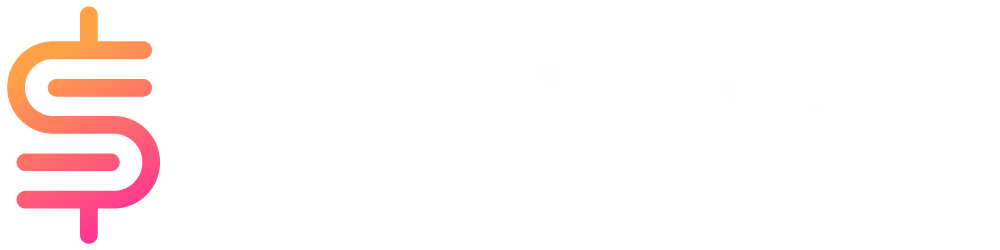

In [2]:
# Load 'filtered_content.html'
with open("filtered_content.html", "r") as file:
    filtered_content = file.read()

filtered_content

In [17]:
soup = BeautifulSoup(filtered_content, "html.parser")

div_elements = soup.find_all("div", class_="content")
element = div_elements[0].find("div", class_="publishing")
a = element.text
a

'\n                    TechCrunch\n                    \n                     •\n                    \n                    13 hours ago\n                   '

In [21]:
utils.get_current_dt()

'20250310_1742'

In [ ]:
period = "2 days ago"
scrape_dt = "20250310_2017"

yahoo_utils.cal_pub_date(period, scrape_dt)

datetime.date(2025, 3, 8)

In [15]:
import torch

In [19]:
rater = SentimentRater()
text = "AAPL stock price spikes after record-breaking sales figures."
outputs = rater.classify_sentiment(text)
torch.softmax(outputs.logits, dim=1)

type(outputs) : <class 'transformers.modeling_outputs.SequenceClassifierOutput'>
outputs : SequenceClassifierOutput(loss=None, logits=tensor([[ 0.2009,  0.6487, -1.2847]]), hidden_states=None, attentions=None)


tensor([[0.3583, 0.5606, 0.0811]])

In [20]:
rater.classify_sentiment(text)

2

In [21]:
rater.classify_sentiment("AAPL Stock Surges After Earnings Report")

5

In [23]:
rater.classify_sentiment("Apple's latest earnings report exceeded analyst expectations")

5

In [18]:
sum([0.9038, 0.0581, 0.0381])

1.0

In [24]:
df = pd.DataFrame({"a": ["ab", "ac", "ad"], "b": ["ba", "bc", "bd"]})
df

,a,b
0,ab,ba
1,ac,bc
2,ad,bd


In [25]:
df["c"] = df["a"] + df["b"]

In [26]:
df

,a,b,c
0,ab,ba,abba
1,ac,bc,acbc
2,ad,bd,adbd


In [27]:
df["e"] = df["a"] + " " + df["c"]
df

,a,b,c,e
0,ab,ba,abba,ab abba
1,ac,bc,acbc,ac acbc
2,ad,bd,adbd,ad adbd


In [28]:
df["f"] = df["b"] + "\n\n" + df["a"]
df

,a,b,c,e,f
0,ab,ba,abba,ab abba,ba\n\nab
1,ac,bc,acbc,ac acbc,bc\n\nac
2,ad,bd,adbd,ad adbd,bd\n\nad
